# Client segmentation  | Cristiane Carneiro

Clustering with DBSCAN

## Import libraries

In [23]:
# data
# ==============================================================================
import numpy as np
import pandas as pd

# charts
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

# pre-processing 
# ==============================================================================
from sklearn.preprocessing import StandardScaler


#from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn import metrics

# warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#display
# ==============================================================================
pd.reset_option('display.max_columns')

## Import dataset

In [24]:
data_women = pd.read_csv('../data/data_clean_women.csv')

In [25]:
data_women.head()

,client_id,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,...,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,total_sum
0,76154,1,0,0,0,0,0,0,0,0,...,0,1,2,0,2,4,1,0,0,5
1,292032,1,0,0,0,0,0,0,0,0,...,1,5,2,1,3,0,2,10,0,12
2,513675,1,0,0,0,0,0,0,0,0,...,8,18,3,5,17,6,7,8,30,51
3,514314,0,1,0,0,0,0,0,0,0,...,3,24,10,4,14,19,0,2,34,55
4,517104,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,2,0,2


In [26]:
data_women.columns

Index(['client_id', 'residence_country 1', 'residence_country 2',
       'residence_country 3', 'residence_country 4', 'residence_country 5',
       'residence_country 6', 'residence_country 7',
       'residence_other region 1', 'residence_other region 2',
       'residence_other region 3', 'residence_other region 4',
       'residence_other region 5', 'residence_other region 6',
       'residence_other region 7', 'residence_other region 8',
       'generation_gen silent/boomers', 'generation_gen x',
       'generation_gen z/alpha', 'generation_millennials',
       'category_children clothes', 'category_handbags',
       'category_men clothes', 'category_men shoes', 'category_other',
       'category_soft', 'category_women clothes', 'category_women shoes',
       'color_cool_jewel', 'color_neutral_pastel', 'color_other',
       'color_vivid_metallic', 'color_warm_earth', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter', 'total_sum'],
      dtype='object')

In [27]:
data_women_model = data_women.drop(columns=['client_id'],axis=1)
data_women_model.head(2)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,...,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,total_sum
0,1,0,0,0,0,0,0,0,0,0,...,0,1,2,0,2,4,1,0,0,5
1,1,0,0,0,0,0,0,0,0,0,...,1,5,2,1,3,0,2,10,0,12


In [28]:
data_women_model.drop(columns=['total_sum'],axis=1,inplace=True)

## Normalization 

In [29]:
data_women_model.columns

Index(['residence_country 1', 'residence_country 2', 'residence_country 3',
       'residence_country 4', 'residence_country 5', 'residence_country 6',
       'residence_country 7', 'residence_other region 1',
       'residence_other region 2', 'residence_other region 3',
       'residence_other region 4', 'residence_other region 5',
       'residence_other region 6', 'residence_other region 7',
       'residence_other region 8', 'generation_gen silent/boomers',
       'generation_gen x', 'generation_gen z/alpha', 'generation_millennials',
       'category_children clothes', 'category_handbags',
       'category_men clothes', 'category_men shoes', 'category_other',
       'category_soft', 'category_women clothes', 'category_women shoes',
       'color_cool_jewel', 'color_neutral_pastel', 'color_other',
       'color_vivid_metallic', 'color_warm_earth', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [30]:
columns_to_normalize = ['category_children clothes', 'category_handbags',
       'category_men clothes', 'category_men shoes', 'category_other',
       'category_soft', 'category_women clothes', 'category_women shoes',
       'color_cool_jewel', 'color_neutral_pastel', 'color_other',
       'color_vivid_metallic', 'color_warm_earth', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter']

In [31]:
subset_to_normalize = data_women_model[columns_to_normalize]

In [32]:
sc = StandardScaler()

In [33]:
normalized_data = sc.fit_transform(subset_to_normalize)

In [34]:
data_women_model[columns_to_normalize] = normalized_data

In [35]:
data_women_model.head(3)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,...,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter
0,1,0,0,0,0,0,0,0,0,0,...,0.284019,-0.815870,-0.955868,-0.493887,-0.703061,-0.612521,-0.178613,-0.679569,-0.845772,-0.825080
1,1,0,0,0,0,0,0,0,0,0,...,0.010956,-0.465336,-0.329940,-0.493887,-0.087654,-0.431288,-0.877251,-0.511340,0.897134,-0.825080
2,1,0,0,0,0,0,0,0,0,0,...,-0.262107,1.988405,1.704327,-0.247338,2.373973,2.105975,0.170706,0.329804,0.548553,4.079763


## Clustering | DBSCAN

In [36]:
#model 
dbscan = DBSCAN(eps=8,min_samples=10)

#fit
dbscan.fit(data_women_model)

DBSCAN(eps=8, min_samples=10)

In [37]:
# clusters
labels = dbscan.labels_

### Clusters 

In [38]:
data_women_model['Cluster'] = labels
data_women_model.head(3)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,...,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,Cluster
0,1,0,0,0,0,0,0,0,0,0,...,-0.815870,-0.955868,-0.493887,-0.703061,-0.612521,-0.178613,-0.679569,-0.845772,-0.825080,0
1,1,0,0,0,0,0,0,0,0,0,...,-0.465336,-0.329940,-0.493887,-0.087654,-0.431288,-0.877251,-0.511340,0.897134,-0.825080,0
2,1,0,0,0,0,0,0,0,0,0,...,1.988405,1.704327,-0.247338,2.373973,2.105975,0.170706,0.329804,0.548553,4.079763,0


### Optimize hyperparameters 

In [39]:
#hyperparameters to tune
eps_values = [6 , 7 , 8 , 9, 10]
min_samples_values = [5, 10, 15, 20, 25]

In [40]:
best_score = -1
best_eps = None
best_min_samples = None

In [41]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_women_model)
        
        if len(set(labels)) > 1:  
            silhouette = metrics.silhouette_score(data_women_model, labels)
            
            if silhouette > best_score:
                best_score = silhouette
                best_eps = eps
                best_min_samples = min_samples

print(f"Best silhouette score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

Best silhouette score: 0.7114756286020424
Best eps: 8
Best min_samples: 20


### Visualization

In [42]:
pca = PCA(2)

data_transformed = pd.DataFrame(pca.fit_transform(data_women_model), columns=["PC1","PC2"])
data_transformed.head(3)

,PC1,PC2
0,-2.328745,-0.245603
1,-1.290519,0.110760
2,4.571227,3.443371


### Visualization

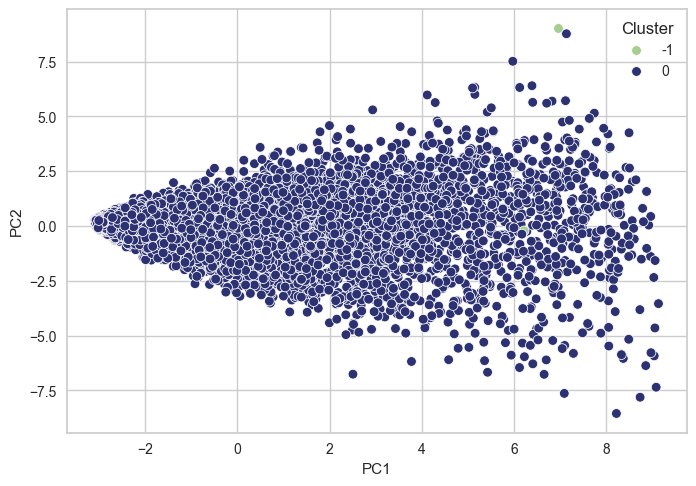

In [43]:
pca_plot = sns.scatterplot(x=data_transformed["PC1"],
                           y=data_transformed["PC2"],
                           hue=data_women_model["Cluster"],
                           palette="crest")